Analyse Health and Demographic Data to Identify Common Traits Leading to Heart Disease

Part 1 :  Data Preparation and Cleaning

Importing Necessary Libraries


In [1]:
import pandas as pd

Importing the Dataset

In [2]:
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015 2 (1).csv")

Converting the Data into a Dataframe

In [3]:
df = pd.DataFrame(data)

Reviewing the Dataset

In [4]:
#First 5 Rows of the Dataset

print(df.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  

In [5]:
#Information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [6]:
#Number of Rows and Columns

print(df.shape)

(253680, 22)


In [7]:
#Check for empty values

print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:
# Number of duplicate rows

print(df.duplicated().sum())

23899


In [9]:
#Handling Duplicate Values

df = df.drop_duplicates()

Part 2 : Exploratory Data Analysis

Importing Necessary Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Section 1 : Univariate Analysis

1.1 :
Examining Distributions of Individual Variables

The Different Age Groups are:
 {1: '18–24', 2: '25–29', 3: '30–34', 4: '35–39', 5: '40–44', 6: '45–49', 7: '50–54', 8: '55–59', 9: '60–64', 10: '65–69', 11: '70–74', 12: '75–79', 13: '80+'}


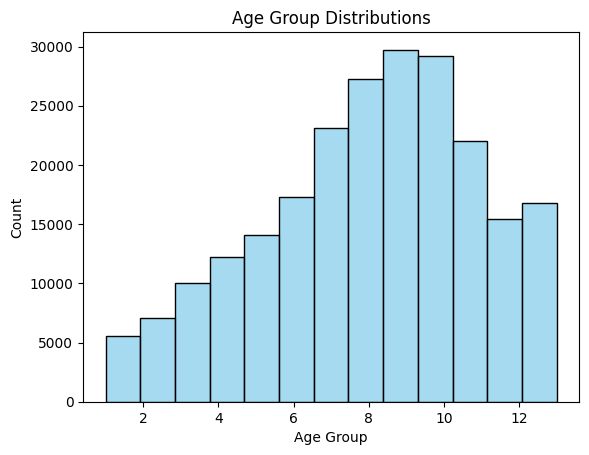

In [11]:
#Histogram for distribution of Age

age_groups = {
    1: "18–24",
    2: "25–29",
    3: "30–34",
    4: "35–39",
    5: "40–44",
    6: "45–49",
    7: "50–54",
    8: "55–59",
    9: "60–64",
    10: "65–69",
    11: "70–74",
    12: "75–79",
    13: "80+"
}
print("The Different Age Groups are:\n", age_groups)
sns.histplot(df['Age'], bins= 13, color = 'skyblue')
plt.title("Age Group Distributions")
plt.xlabel("Age Group")
plt.show()

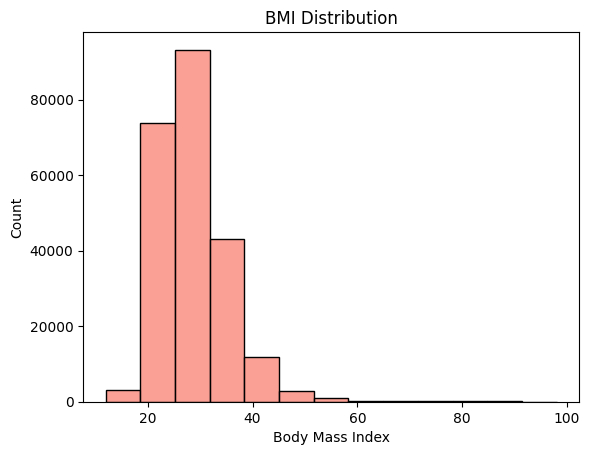

In [12]:
#Distribution of Body Mass Index(BMI)

sns.histplot(df['BMI'], bins= 13, color = "salmon")
plt.title("BMI Distribution")
plt.xlabel("Body Mass Index")
plt.show()

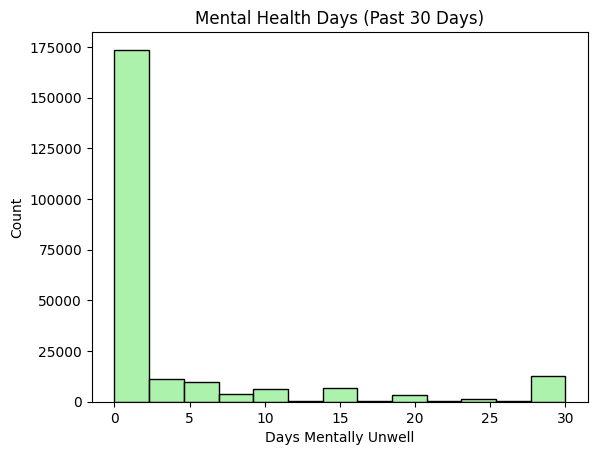

In [13]:
#Distribution of Mental Heath

sns.histplot(df['MentHlth'], bins=13, color='lightgreen')
plt.title("Mental Health Days (Past 30 Days)")
plt.xlabel("Days Mentally Unwell")
plt.show()

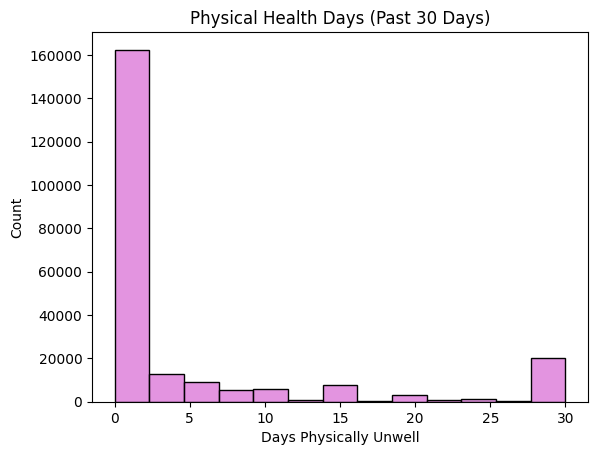

In [14]:
#Distribution of Physical Health

sns.histplot(df['PhysHlth'], bins=13, color='orchid')
plt.title("Physical Health Days (Past 30 Days)")
plt.xlabel("Days Physically Unwell")
plt.show()

1.2 : Investigating Prevalance of Health Condition

In [15]:
# Renaming Diabetes for better clarity

df['Diabetes'] = df['Diabetes'].replace({0: 'No Diabetes', 1: 'Pre-Diabetes', 2: 'Diabetes'})

In [16]:
# List of binary condition variables to plot

condition_vars = {
    'HighBP': 'High Blood Pressure',
    'HighChol': 'High Cholesterol',
    'Smoker': 'Smoker (Ever Smoked 100+ Cigarettes)',
    'Stroke': 'Ever Had a Stroke',
    'PhysActivity': 'Physical Activity (Past 30 Days)',
    'DiffWalk': 'Difficulty Walking',
    'HvyAlcoholConsump': 'Heavy Alcohol Consumption',
}

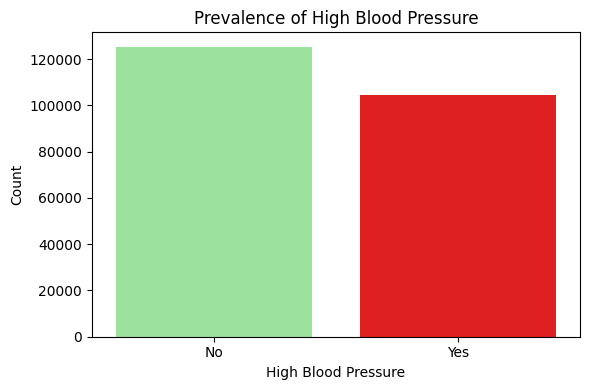

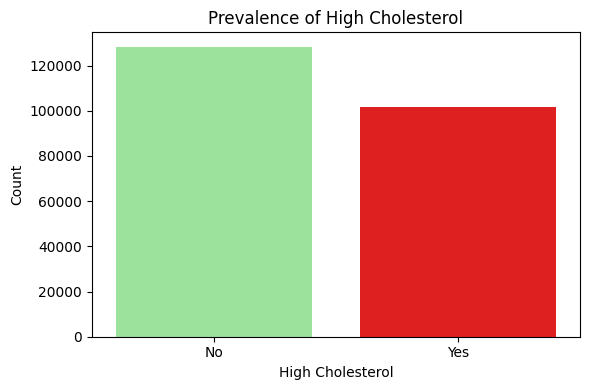

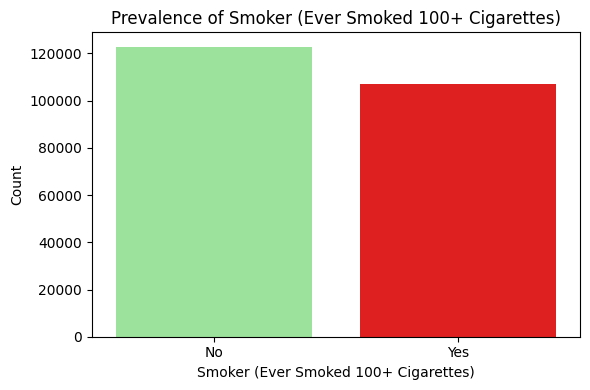

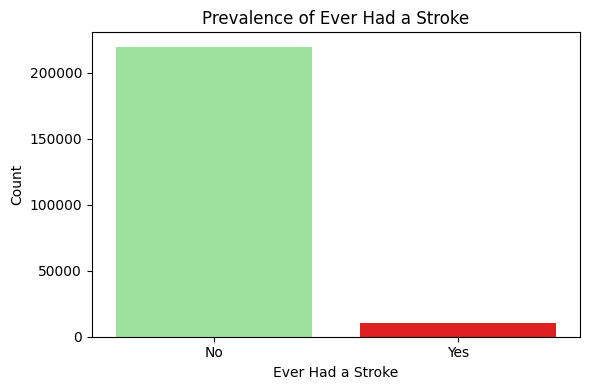

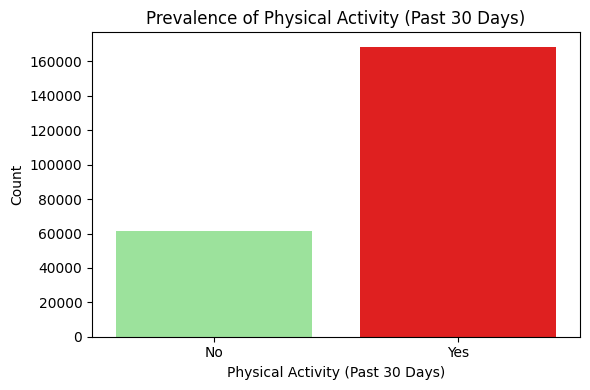

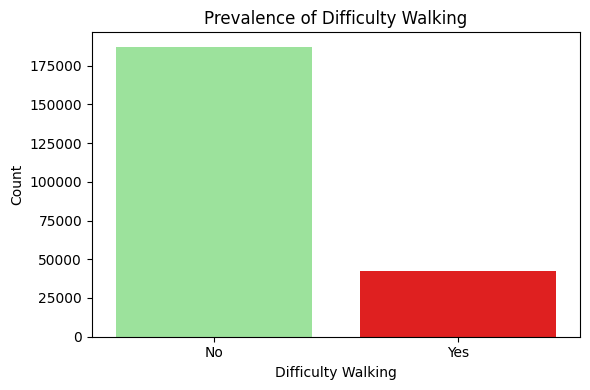

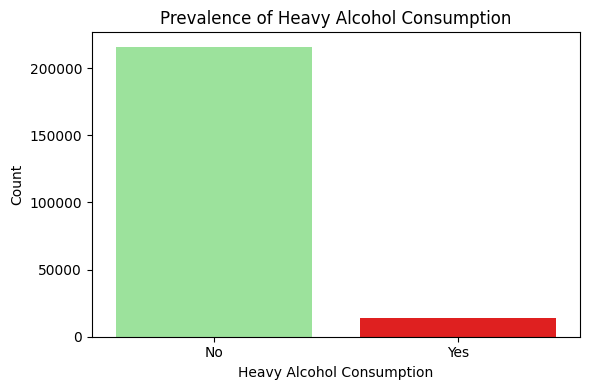

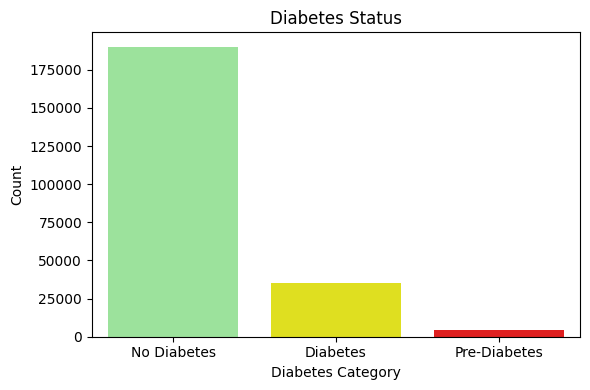

In [17]:
#Different Health Concerns

for var, label in condition_vars.items():
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue=var, data=df, palette=["lightgreen", "red"], legend=False)
    plt.title(f'Prevalence of {label}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel(label)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

#Presence of Diabetes (3 Levels)

plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', hue='Diabetes', data=df, palette=["lightgreen", "yellow", "red"], legend=False)
plt.title('Diabetes Status')
plt.xlabel('Diabetes Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

1.3 : Analysing the Distribution of Heart Disease

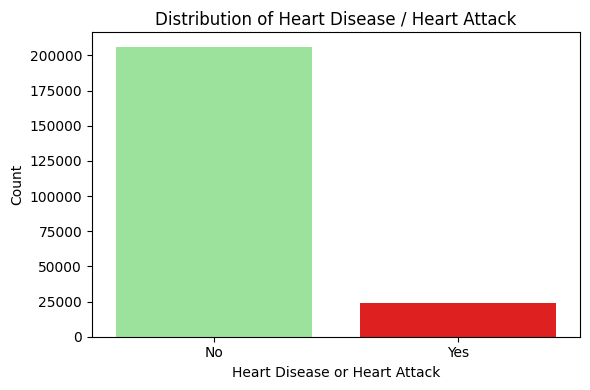

In [18]:
# Bar Chart

plt.figure(figsize=(6, 4))
sns.countplot(x= 'HeartDiseaseorAttack', hue= 'HeartDiseaseorAttack', data=df, palette=["lightgreen", "red"], legend=False)
plt.title('Distribution of Heart Disease / Heart Attack')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Heart Disease or Heart Attack')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

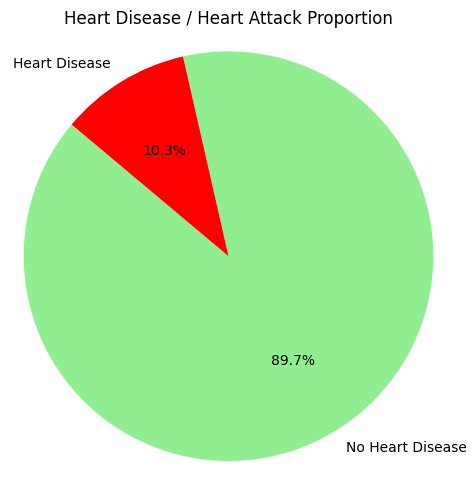

In [19]:
# Pie Chart

plt.figure(figsize=(5, 5))
labels = ['No Heart Disease', 'Heart Disease']
sizes = df['HeartDiseaseorAttack'].value_counts().sort_index()
colors = ['lightgreen', 'red']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Heart Disease / Heart Attack Proportion')
plt.axis('equal')
plt.tight_layout()
plt.show()

Section 2 : Bivariate Analysis

2.1 : Exploring Relationships with Heart Disease

In [50]:
# Defining key variables to compare

key_vars = {
    'HighBP': 'High Blood Pressure',
    'HighChol': 'High Cholesterol',
    'Smoker': 'Smoker',
    'Stroke': 'Had a Stroke',
    'PhysActivity': 'Physical Activity (Past 30 Days)',
    'DiffWalk': 'Difficulty Walking',
    'HvyAlcoholConsump': 'Heavy Alcohol Consumption',
}

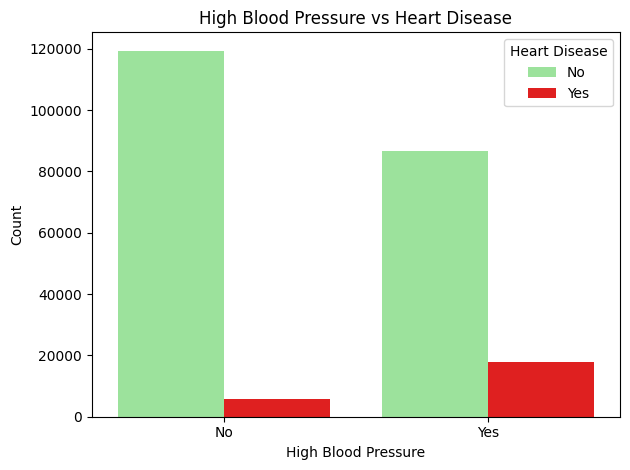

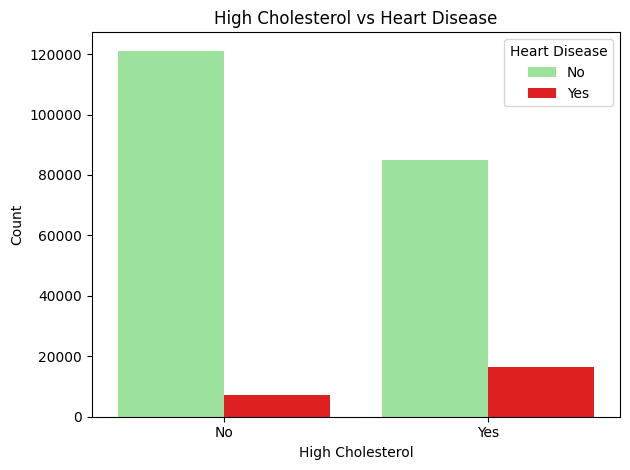

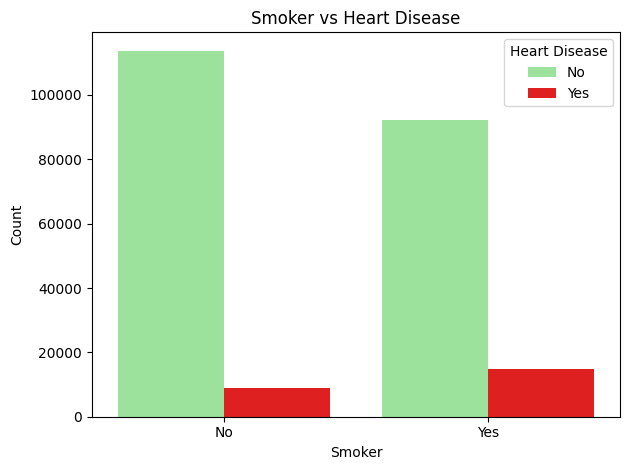

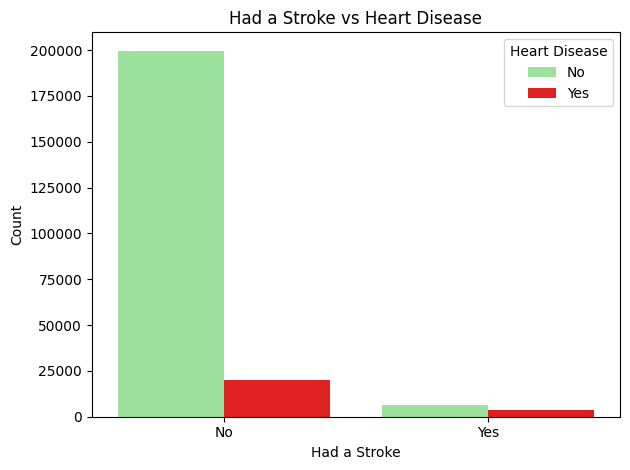

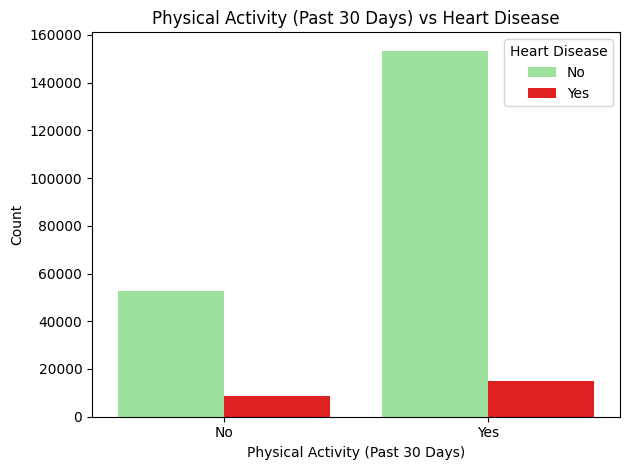

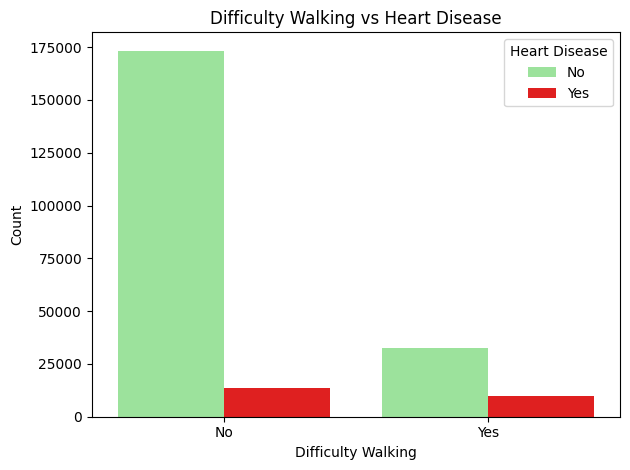

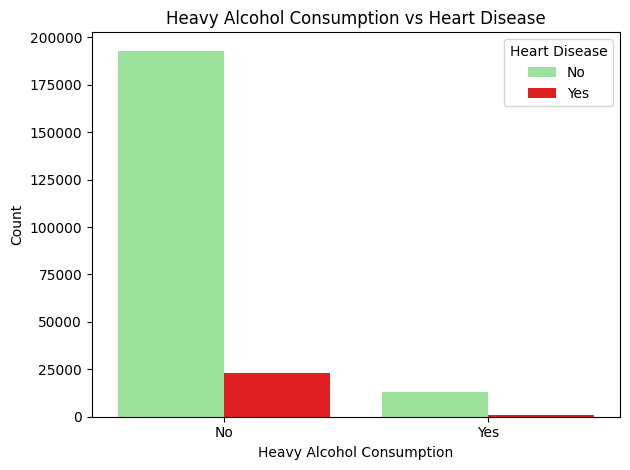

In [51]:
# Bar Chart for Binary Health Condition vs Heart Disease

for var, label in key_vars.items():
    sns.countplot(x=var, hue='HeartDiseaseorAttack', data=df, palette=['lightgreen', 'red'])
    plt.title(f"{label} vs Heart Disease")
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.legend(title="Heart Disease", labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

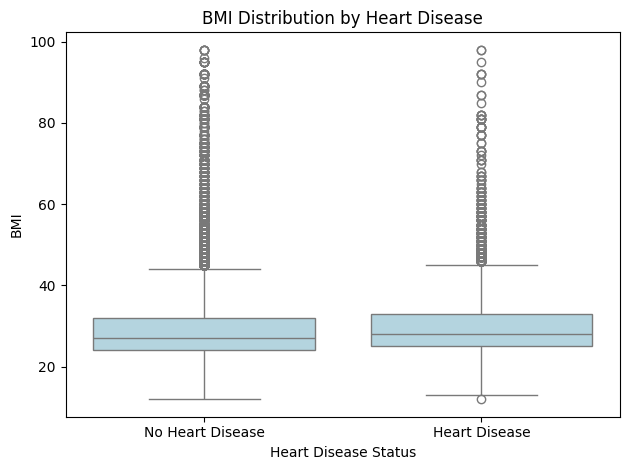

In [37]:
# Boxplot for BMI by Heart Disease

sns.boxplot(x = 'HeartDiseaseorAttack', y = 'BMI', data = df, color = "lightblue")
plt.title('BMI Distribution by Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease Status')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

2.2 : Visualising Correlations Between Variables

In [55]:
# Selecting Continous Variables 

cont_vars = ['Age', 'BMI', 'MentHlth', 'PhysHlth', 'GenHlth']

In [56]:
# Computing Correlation Matrix

corr_matrix = df[cont_vars].corr()

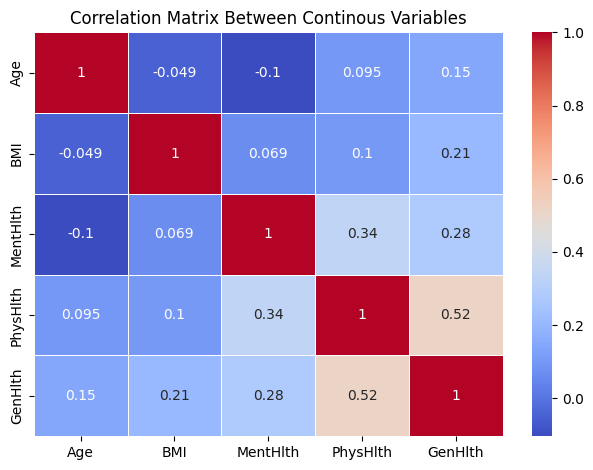

In [57]:
# Plotting the Heatmap

sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Matrix Between Continous Variables")
plt.tight_layout()
plt.show()

2.3 : Compare Heart Diseases Across Various Demographic Groups

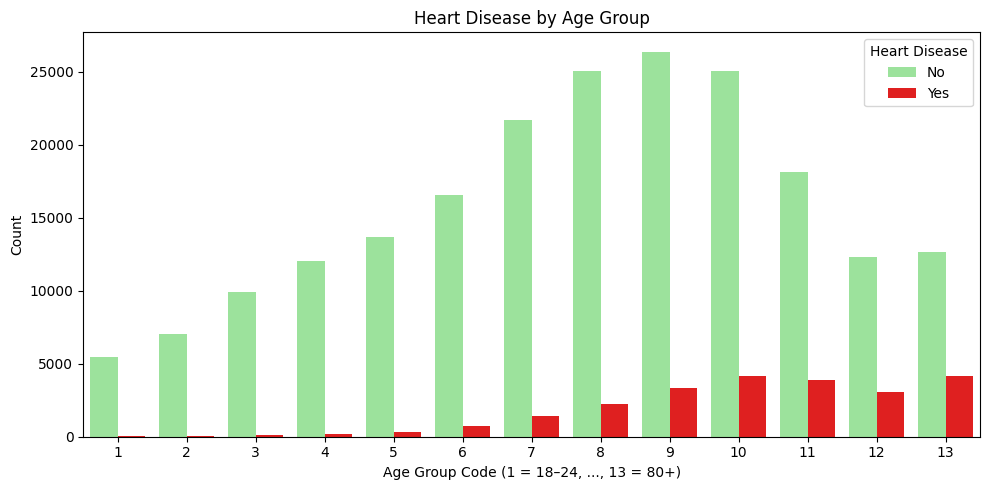

In [65]:
#Heart Diseases by Age

plt.figure(figsize=(10,5))
sns.countplot(x='Age', hue='HeartDiseaseorAttack', data=df, palette= ['lightgreen', 'red'])
plt.title("Heart Disease by Age Group")
plt.xlabel("Age Group Code (1 = 18–24, ..., 13 = 80+)")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

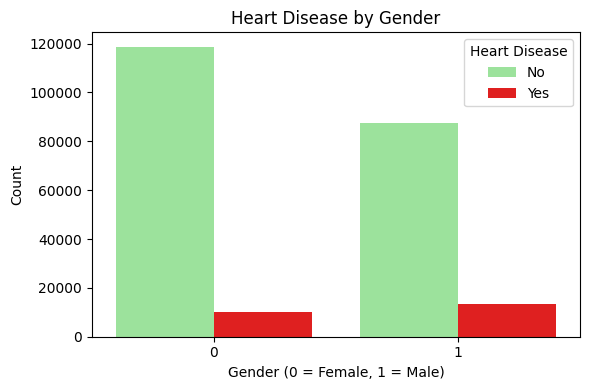

In [68]:
#Heart Diseases by Gender

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df, palette= ['lightgreen', 'red'])
plt.title("Heart Disease by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Education Levels: {1: 'No School', 2: 'Elementary', 3: 'Some High School', 4: 'High School Grad', 5: 'Some College', 6: 'College Grad'}


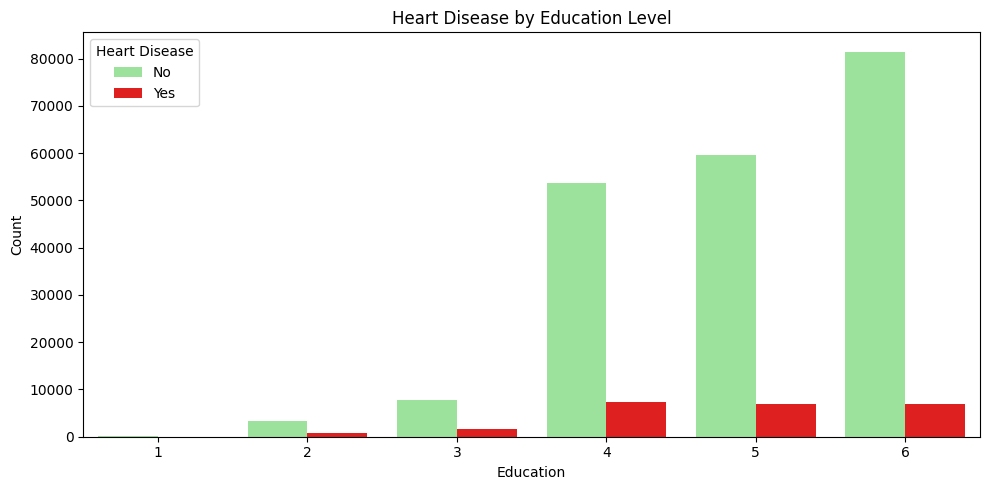

In [72]:
#Heart Diseases by Education Level

edu_levels = { 1: "No School",
    2: "Elementary",
    3: "Some High School",
    4: "High School Grad",
    5: "Some College",
    6: "College Grad"
    }
print(f"Education Levels: {edu_levels}")

plt.figure(figsize=(10,5))
sns.countplot(x='Education', hue='HeartDiseaseorAttack', data=df, palette= ['lightgreen', 'red'])
plt.title("Heart Disease by Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()